In [1]:
import numpy as np
import spacy
import gensim
import csv
import pandas as pd

## Cleaning for Word Embeddings

In [2]:
docs = {}

In [3]:
all_texts = []

In [4]:
with open('Vienna1870to2009_bypage.txt') as f:
    lines = f.readlines()

In [5]:
jumbled = []

In [6]:
correct = []

In [7]:
for line in lines:
    try:
        name, text = line.split(".txt")
        correct.append((name, text))
    except:
        jumbled.append(line)

In [320]:
docs = {}

In [321]:
for page in correct:
    name, text = page
    year, page = name.split("Yearbook")[1].split(" ")[1:]
    words = text.split("\"")[1].split(" ")
    good_words = []
    for word in words:
        if len(word) > 2:
            good_words.append(word)
    docs[(year, page)] = good_words

In [323]:
docs[('1870', '102')]

['regulier',
 'jubiliruugeu',
 'zahlreich',
 'veraender',
 'stand',
 'beamt',
 'dien',
 'magistratsrat',
 'anstalt',
 'nament',
 'tod',
 'oberbeamt',
 'verlor',
 'sekreta',
 'bemerkt',
 'pensionieruugeu',
 'vorfiel',
 'amt',
 'vorstaend',
 'vorzueg',
 'erfahren',
 'rat',
 'vizebuergermeist',
 'ferdinand',
 'ritt',
 'bergmiill',
 'ausserordent',
 'lag',
 'gefolgt',
 'uebergangsperiod',
 'kommunal',
 'verwalt',
 'geschaeft',
 'anerkennungswuerd',
 'geleitet',
 'oberbuchhalt',
 'brothub',
 'spitz',
 'kontrollorgan',
 'beruf',
 'durchgreif',
 'umgestalt',
 'einricht',
 'reform',
 'finanzgebahr',
 'finanziell',
 'frag',
 'wichtig',
 'dien',
 'geleistet',
 'magistratsrat',
 'georg',
 'holnstein',
 'herr',
 'haas',
 'vorstaend',
 'herr',
 'gustav',
 'anstalt',
 'versorgungshaus',
 'mauerbach',
 'schneid',
 'waisenhausvat',
 'ruhestand',
 'magistratsrat',
 'fray',
 'verwalt',
 'versetzt',
 'voll',
 'anerkenn',
 'verdien',
 'herr',
 'nab',
 'dienstleist',
 'isidor',
 'hein',
 'sjaehrig',
 'dien

In [324]:
for page in jumbled:
    pages = page.split("Yearbook")[1:]
    for pag in pages:
        # first page
        name, text = pag.split(".txt")
        year, page = name.split(" ")[1:]
        words = text.split("\"")[1].split(" ")
        good_words = []
        for word in words:
            if len(word) > 2:
                good_words.append(word)
        docs[(year, page)] = good_words

In [325]:
timed_docs = [[], [], [], [], [], [], [], [], []]

In [326]:
for doc in docs:
    year, page = doc
#     if int(year) >= 1870 and int(year) <=1880:
#         timed_docs[0].append(docs[doc])
#     if int(year) >= 1881 and int(year) <=1895:
#         timed_docs[1].append(docs[doc])
#     if int(year) >= 1896 and int(year) <=1902:
#         timed_docs[2].append(docs[doc])
#     if int(year) >= 1903 and int(year) <=1908:
#         timed_docs[3].append(docs[doc])
#     if int(year) >= 1909 and int(year) <=1913:
#         timed_docs[4].append(docs[doc])
    if int(year) >= 1918 and int(year) <=1935:
        timed_docs[0].append(docs[doc])
    if int(year) >= 1946 and int(year) <=1954:
        timed_docs[1].append(docs[doc])
    if int(year) >= 1955 and int(year) <=1959:
        timed_docs[2].append(docs[doc])
    if int(year) >= 1960 and int(year) <=1964:
        timed_docs[3].append(docs[doc])
    if int(year) >= 1965 and int(year) <=1968:
        timed_docs[4].append(docs[doc])
    if int(year) >= 1969 and int(year) <=1979:
        timed_docs[5].append(docs[doc])
    if int(year) >= 1980 and int(year) <=1989:
        timed_docs[6].append(docs[doc])
    if int(year) >= 1990 and int(year) <=1996:
        timed_docs[7].append(docs[doc])
    if int(year) >= 1997 and int(year) <=2009:
        timed_docs[8].append(docs[doc])

In [327]:
timed_docs[0][0]

['finanz',
 'steuerwes',
 'steueramt',
 'gezeichnet',
 'depositenbank',
 'uebernahm',
 'gemeinderatsbeschluss',
 'vorn',
 'oesterreich',
 'jmmobiliar',
 'erricht',
 'baustof',
 'beschloss',
 'aktienkapital',
 'akti',
 'nennwert',
 'uebernomm',
 'sitzung',
 'beschloss',
 'niederoesterreich',
 'bodengegenossenschaft',
 'mitglied',
 'geschaeftsanteil',
 'beizutret',
 'gemeinderatsbeschluss',
 'liquidier',
 'vorsteh',
 'erwaehnt',
 'oesterreich',
 'vieh',
 'fleischverkehrsgesellschaft',
 'einverstand',
 'erklaert',
 'gruendend',
 'deutschoesterreich',
 'wirtschaftsverband',
 'viehverkehr',
 'kapital',
 'beigetret',
 'firma',
 'teret',
 'deutschoesterreich',
 'textilretablierungsgesellschaft',
 'stammeinlag',
 'beteiligt',
 'gemeinderatsbeschluss',
 'oesterreich',
 'kohleneinfuhrgesellschaftm',
 'stammeinlag',
 'schweinemastanstalt',
 'pernhof',
 'stammcinlag',
 'beigetret',
 'ber',
 'verschied',
 'kriegszeit',
 'entstand',
 'gesellschaft',
 'versorg',
 'stadt',
 'lebensmitteln',
 'versorg'

In [26]:
timed_docs[2][44]

['tisch',
 'sesseln',
 'ausgestattet',
 'lehr',
 'schreibtisch',
 'zugewies',
 'aufstell',
 'tisch',
 'sessel',
 'schuel',
 'lehr',
 'orientiert',
 'mitschuel',
 'sprech',
 'je',
 'schuelerzahl',
 'raumlich',
 'verhaeltnis',
 'steh',
 'tisch',
 'halbkreisfoerm',
 'tafel',
 'rechteck',
 'angeordnet',
 'erfolgreich',
 'reformarbeit',
 'schul',
 'klassenschuelerzahl',
 'grenz',
 'hinausgeh',
 'durchschnitt',
 'volk',
 'haupt',
 'sonderschul',
 'schuljahr',
 'schuljahr',
 'schuel',
 'hingewies',
 'gesamtdurchschnitt',
 'handelt',
 'wirklich',
 'aufteil',
 'schuel',
 'natu',
 'reih',
 'umstaend',
 'vermeid',
 'schulweg',
 'schonung',
 'besteh',
 'klassenverba',
 'fuehrung',
 'klein',
 'klass',
 'duenn',
 'besiedelt',
 'randgebiet',
 'paedagog',
 'erfordernis',
 'schwach',
 'klassenbesetz',
 'llilf',
 'sonderschul',
 'ruecksicht',
 'genomm',
 'umstaend',
 'bring',
 'selbstverstaend',
 'klass',
 'ueberdurchschnitt',
 'schuelerzahl',
 'aufweis',
 'zahl',
 'klass',
 'unterdurchschnitt',
 'beset

In [241]:
timed_lens = {}

In [242]:
for i, time in enumerate(timed_docs):
    timed_lens[i] = []
    for doc in time:
        timed_lens[i].append(len(doc))

In [301]:
for lengths in timed_lens:
    print(len(timed_lens[lengths]))

3376
3700
3103
3217
2757
3639
3096
3105
3135
2705
3555
3376
3004
3348


In [244]:
len(timed_lens[1])

3700

In [245]:
len(timed_lens[2])

3103

In [246]:
len(timed_lens[3])

3217

In [247]:
len(timed_lens[4])

2757

### Top frequencies

In [35]:
from gensim.models import Word2Vec

In [328]:
len(timed_docs)

9

In [329]:
w2vmodel_0 = Word2Vec(
        timed_docs[0],
        vector_size=100,
        window=10)

In [330]:
w2vmodel_1 = Word2Vec(
        timed_docs[1],
        vector_size=100,
        window=10)

In [331]:
w2vmodel_2 = Word2Vec(
        timed_docs[2],
        vector_size=100,
        window=10)

In [332]:
w2vmodel_3 = Word2Vec(
        timed_docs[3],
        vector_size=100,
        window=10)

In [333]:
w2vmodel_4 = Word2Vec(
        timed_docs[4],
        vector_size=100,
        window=10)

In [334]:
w2vmodel_5 = Word2Vec(
        timed_docs[5],
        vector_size=100,
        window=10)

In [335]:
w2vmodel_6 = Word2Vec(
        timed_docs[6],
        vector_size=100,
        window=10)

In [336]:
w2vmodel_7 = Word2Vec(
        timed_docs[7],
        vector_size=100,
        window=10)

In [337]:
w2vmodel_8 = Word2Vec(
        timed_docs[8],
        vector_size=100,
        window=10)

In [339]:
# w2vmodel_9 = Word2Vec(
#         timed_docs[9],
#         vector_size=100,
#         window=10)

In [259]:
# w2vmodel_10 = Word2Vec(
#         timed_docs[10],
#         vector_size=100,
#         window=10)

In [260]:
# w2vmodel_11 = Word2Vec(
#         timed_docs[11],
#         vector_size=100,
#         window=10)

In [261]:
# w2vmodel_12 = Word2Vec(
#         timed_docs[12],
#         vector_size=100,
#         window=10)

In [262]:
# w2vmodel_13 = Word2Vec(
#         timed_docs[13],
#         vector_size=100,
#         window=10)

In [ ]:
# w2vmodel_0.wv.most_similar("sozial")

In [ ]:
# w2vmodel_1.wv.most_similar("sozial")

In [ ]:
# w2vmodel_2.wv.most_similar("sozial")

In [ ]:
# w2vmodel_3.wv.most_similar("sozial")

In [ ]:
# w2vmodel_4.wv.most_similar("sozial")

In [43]:
key_words = ["wohn", "bild", "fuersorg", "gesund", "arbeit", "gemeindebau"]


In [44]:
search_words = ["foerder", "wohnbaufoerder", "gemeinnuetz", "neubaut",
                "fond", "miet", "darleh", "gefoerdert", "antraeg", "stadterneuer"] 

In [45]:
housing_red_words = ["miethaeus",
"wohnung",
"wohnhaus",
"wohnhaeus",
"gemeindebau",
"wohnungsberatungszentrum",
"wohnbausteuer",
"zinshaeus",
"zinhaus",
"mietzins",
"wohnsiedlung",
"wohnungsbeduerftig",
"gemeindewohn",
"hausbesorger",
"wohnungsvergab",
"wohnbauprogramm",
"hausverwalt"]

In [46]:
search_words_all = key_words + housing_red_words + search_words

In [47]:
time_period_word_frequencies = {}

In [48]:
all_words_freqs = {}

In [49]:
for page in docs:
    for word in docs[page]:
        if word not in all_words_freqs:
            all_words_freqs[word] = 0
        if word in all_words_freqs:
            all_words_freqs[word] += 1

In [50]:
all_words_freqs = dict(sorted(all_words_freqs.items(), key=lambda item: item[1], reverse=True))

In [51]:
all_words_freqs

{'stadt': 35516,
 'arbeit': 20696,
 'ab': 19802,
 'kind': 19536,
 'durchgefuehrt': 18762,
 'strass': 18447,
 'betrieb': 18041,
 'zahl': 17992,
 'prozent': 17587,
 'oesterreich': 17549,
 'grund': 16494,
 'abteil': 16472,
 'rund': 15785,
 'erricht': 15637,
 'bereich': 15530,
 'million': 15410,
 'fall': 15406,
 'bb': 14644,
 'schilling': 14167,
 'ma': 13672,
 'erfolgt': 12963,
 'gesetz': 11673,
 'rahm': 11523,
 'folgend': 11427,
 'haus': 11382,
 'stand': 10751,
 'betrag': 10750,
 'bau': 10738,
 'schul': 10715,
 'verschied': 10714,
 'projekt': 10606,
 'wohnung': 10381,
 'dr': 10343,
 'bezug': 10148,
 'besteh': 10087,
 'hoeh': 10079,
 'alt': 10021,
 'verfueg': 9987,
 'betreff': 9761,
 'begonn': 9660,
 'stell': 9589,
 'erhalt': 9513,
 'dien': 9436,
 'mann': 9303,
 'einzeln': 9190,
 'gewerb': 8908,
 'erford': 8861,
 'zeit': 8638,
 'verordn': 8564,
 'technisch': 8537,
 'einricht': 8510,
 'je': 8456,
 'durchfuehr': 8435,
 'kost': 8242,
 'anlag': 8208,
 'anstalt': 8156,
 'gebiet': 8083,
 'verwal

In [52]:
sorted_words = list(all_words_freqs.keys())[0:10000]

In [53]:
sorted_words[0:10]

['stadt',
 'arbeit',
 'ab',
 'kind',
 'durchgefuehrt',
 'strass',
 'betrieb',
 'zahl',
 'prozent',
 'oesterreich']

In [54]:
i = 0

In [55]:
for docs in timed_docs:
    time_period_word_frequencies[i] = {}
    for word in sorted_words:
        time_period_word_frequencies[i][word] = 0
    for doc in docs:
        for word in sorted_words:
            if word in doc:
                time_period_word_frequencies[i][word] += 1
    i += 1

In [56]:
time_period_word_frequencies[1]

{'stadt': 761,
 'arbeit': 667,
 'ab': 1225,
 'kind': 586,
 'durchgefuehrt': 304,
 'strass': 240,
 'betrieb': 779,
 'zahl': 731,
 'prozent': 163,
 'oesterreich': 481,
 'grund': 881,
 'abteil': 327,
 'rund': 310,
 'erricht': 612,
 'bereich': 48,
 'million': 155,
 'fall': 465,
 'bb': 1097,
 'schilling': 143,
 'ma': 23,
 'erfolgt': 529,
 'gesetz': 662,
 'rahm': 72,
 'folgend': 894,
 'haus': 392,
 'stand': 520,
 'betrag': 486,
 'bau': 312,
 'schul': 259,
 'verschied': 350,
 'projekt': 38,
 'wohnung': 233,
 'dr': 276,
 'bezug': 365,
 'besteh': 473,
 'hoeh': 346,
 'alt': 440,
 'verfueg': 464,
 'betreff': 403,
 'begonn': 183,
 'stell': 733,
 'erhalt': 408,
 'dien': 372,
 'mann': 245,
 'einzeln': 539,
 'gewerb': 325,
 'erford': 298,
 'zeit': 673,
 'verordn': 267,
 'technisch': 216,
 'einricht': 285,
 'je': 440,
 'durchfuehr': 350,
 'kost': 320,
 'anlag': 270,
 'anstalt': 573,
 'gebiet': 399,
 'verwalt': 499,
 'herstell': 245,
 'untersuch': 165,
 'genomm': 385,
 'abgeschloss': 120,
 'bedienstet'

In [57]:
with open('time_period_word_frequencies.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in time_period_word_frequencies.items():
        writer.writerow([key, value])

## Searching for words by dictionary

In [59]:
time_period_key_words = {}

In [60]:
stable_words = ["verordn", "gesetz", "museum", "friedhof", "zentralfriedhof"]

In [61]:
for period in time_period_word_frequencies:
    time_period_key_words[period] = {}
    for word in search_words_all:
        try:
            time_period_key_words[period][word] = time_period_word_frequencies[period][word]
        except KeyError:
            time_period_key_words[period][word] = 0

In [62]:
for period in time_period_word_frequencies:
    for word in stable_words:
        try:
            time_period_key_words[period][word] = time_period_word_frequencies[period][word]
        except KeyError:
            time_period_key_words[period][word] = 0

In [63]:
valid_words = []

In [64]:
for word in search_words_all:
    score = 0
    for period in time_period_key_words:
        score += time_period_key_words[period][word]
    if score > 4:
        valid_words.append(word)

In [65]:
valid_words = list(np.unique(valid_words))

In [66]:
valid_words

['antraeg',
 'arbeit',
 'bild',
 'darleh',
 'foerder',
 'fond',
 'fuersorg',
 'gefoerdert',
 'gemeindewohn',
 'gemeinnuetz',
 'gesund',
 'hausverwalt',
 'miet',
 'mietzins',
 'neubaut',
 'stadterneuer',
 'wohn',
 'wohnbaufoerder',
 'wohnbauprogramm',
 'wohnhaus',
 'wohnung']

In [67]:
time_period_key_words

{0: {'wohn': 168,
  'bild': 610,
  'fuersorg': 223,
  'gesund': 301,
  'arbeit': 3208,
  'gemeindebau': 0,
  'miethaeus': 0,
  'wohnung': 760,
  'wohnhaus': 157,
  'wohnhaeus': 0,
  'wohnungsberatungszentrum': 0,
  'wohnbausteuer': 0,
  'zinshaeus': 0,
  'zinhaus': 0,
  'mietzins': 204,
  'wohnsiedlung': 0,
  'wohnungsbeduerftig': 0,
  'gemeindewohn': 0,
  'hausbesorger': 0,
  'wohnungsvergab': 0,
  'wohnbauprogramm': 0,
  'hausverwalt': 14,
  'foerder': 362,
  'wohnbaufoerder': 0,
  'gemeinnuetz': 175,
  'neubaut': 291,
  'fond': 874,
  'miet': 193,
  'darleh': 110,
  'gefoerdert': 171,
  'antraeg': 559,
  'stadterneuer': 0,
  'verordn': 678,
  'gesetz': 2368,
  'museum': 261,
  'friedhof': 534,
  'zentralfriedhof': 551},
 1: {'wohn': 40,
  'bild': 156,
  'fuersorg': 315,
  'gesund': 103,
  'arbeit': 667,
  'gemeindebau': 0,
  'miethaeus': 0,
  'wohnung': 233,
  'wohnhaus': 52,
  'wohnhaeus': 0,
  'wohnungsberatungszentrum': 0,
  'wohnbausteuer': 0,
  'zinshaeus': 0,
  'zinhaus': 0,
 

In [68]:
stable_valid_words = []

In [69]:
for word in stable_words:
    score = 0
    for period in time_period_key_words:
        score += time_period_key_words[period][word]
    if score > 4:
        stable_valid_words.append(word)

In [70]:
stable_valid_words

['verordn', 'gesetz', 'museum', 'friedhof', 'zentralfriedhof']

In [71]:
def compareModels_pretrained(embeddings_raw):
    cats = list(embeddings_raw.keys())
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_aligned

In [72]:
def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """
    Original script: https://gist.github.com/quadrismegistus/09a93e219a6ffc4f216fb85235535faf
    Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
        
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """

    # patch by Richard So [https://twitter.com/richardjeanso) (thanks!) to update this code for new version of gensim
    # base_embed.init_sims(replace=True)
    # other_embed.init_sims(replace=True)

    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)
    # help
    in_base_embed.wv.fill_norms(force=True)
    in_other_embed.wv.fill_norms(force=True)


    # get the (normalized) embedding matrices
    base_vecs = in_base_embed.wv.get_normed_vectors()
    other_vecs = in_other_embed.wv.get_normed_vectors()

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one, i.e. multiplying the embedding matrix by "ortho"
    other_embed.wv.vectors = (other_embed.wv.vectors).dot(ortho)    
    
    return other_embed

def intersection_align_gensim(m1, m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1 & vocab_m2
    if words: common_vocab &= set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1 - common_vocab and not vocab_m2 - common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count") + m2.wv.get_vecattr(w, "count"), reverse=True)
    # print(len(common_vocab))

    # Then for each model...
    for m in [m1, m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.key_to_index[w] for w in common_vocab]
        old_arr = m.wv.vectors
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.vectors = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        new_key_to_index = {}
        new_index_to_key = []
        for new_index, key in enumerate(common_vocab):
            new_key_to_index[key] = new_index
            new_index_to_key.append(key)
        m.wv.key_to_index = new_key_to_index
        m.wv.index_to_key = new_index_to_key
        
        print(len(m.wv.key_to_index), len(m.wv.vectors))
        
    return (m1,m2)

In [366]:
embeddings_dict = {"0":w2vmodel_0, "1":w2vmodel_1, "2":w2vmodel_2, 
                   "3":w2vmodel_3, "4":w2vmodel_4, "5":w2vmodel_5, 
                   "6":w2vmodel_6, "7":w2vmodel_7, "8":w2vmodel_8}

In [341]:
comparedEmbeddings = compareModels_pretrained(embeddings_dict)

5572 5572
5572 5572
4682 4682
4682 4682
4314 4314
4314 4314
3963 3963
3963 3963
3794 3794
3794 3794
3571 3571
3571 3571
3409 3409
3409 3409
3241 3241
3241 3241
4682 4682
4682 4682
4314 4314
4314 4314
3963 3963
3963 3963
3794 3794
3794 3794
3571 3571
3571 3571
3409 3409
3409 3409
3241 3241
3241 3241
3963 3963
3963 3963
3963 3963
3963 3963
3794 3794
3794 3794
3571 3571
3571 3571
3409 3409
3409 3409
3241 3241
3241 3241
3571 3571
3571 3571
3571 3571
3571 3571
3571 3571
3571 3571
3409 3409
3409 3409
3241 3241
3241 3241
3241 3241
3241 3241
3241 3241
3241 3241
3241 3241
3241 3241
3241 3241
3241 3241


In [412]:
comparedEmbeddings['0']

10

In [215]:
comparedEmbeddings['0'][1].wv.most_similar("wohn", topn=25)

[('zimm', 0.8118779063224792),
 ('gemietet', 0.7909741401672363),
 ('speisesaal', 0.7618361711502075),
 ('kuech', 0.7614502906799316),
 ('herberg', 0.7526957392692566),
 ('rochusgass', 0.7452142238616943),
 ('untergebracht', 0.7420210838317871),
 ('wohnung', 0.7352701425552368),
 ('geschaeftshaus', 0.7263896465301514),
 ('wohnzweck', 0.7196519374847412),
 ('bewohnt', 0.7159452438354492),
 ('adaptiererert', 0.7158632874488831),
 ('krankenzimm', 0.7124803066253662),
 ('tagraum', 0.7104253768920898),
 ('schlafraum', 0.7095922827720642),
 ('warteraum', 0.7073178887367249),
 ('krankenbett', 0.7068186402320862),
 ('parterr', 0.7062253355979919),
 ('uebersiedelt', 0.7021343111991882),
 ('wohnend', 0.6978307366371155),
 ('erdgeschoss', 0.6964223384857178),
 ('stock', 0.688295841217041),
 ('unterkunft', 0.6791443228721619),
 ('unterbring', 0.6769567728042603),
 ('stockwerk', 0.6769379377365112)]

In [216]:
comparedEmbeddings['0'][2].wv.most_similar("wohn", topn=25)

[('interessent', 0.9957826733589172),
 ('wohnungsnot', 0.9957282543182373),
 ('lieg', 0.9954580068588257),
 ('roterdstrass', 0.9952093958854675),
 ('mannswoerth', 0.9951682686805725),
 ('altmannsdorf', 0.9951539635658264),
 ('verwert', 0.9949289560317993),
 ('wett', 0.9947805404663086),
 ('beginnt', 0.9947078227996826),
 ('beiderseit', 0.9946883320808411),
 ('gebraucht', 0.9946141242980957),
 ('widmung', 0.9944372773170471),
 ('dom', 0.9944140911102295),
 ('vermietet', 0.9942833185195923),
 ('dach', 0.9941552877426147),
 ('mach', 0.9941436052322388),
 ('verbreiter', 0.9940927028656006),
 ('inzersdorf', 0.9940381050109863),
 ('gablenzgass', 0.9939783215522766),
 ('einfach', 0.993852972984314),
 ('derzeit', 0.9937548041343689),
 ('westbahnhof', 0.9936214685440063),
 ('nord', 0.9935792088508606),
 ('restlich', 0.9935490489006042),
 ('donaukanaluf', 0.9934955835342407)]

In [177]:
comparedEmbeddings['0'][3].wv.most_similar("wohn", topn=25)

[('amtsgebaeud', 0.8747935891151428),
 ('benuetzungsbewill', 0.772939145565033),
 ('wohnhaus', 0.7476397752761841),
 ('verwaltet', 0.7468332648277283),
 ('verwalt', 0.7417085766792297),
 ('vermietet', 0.7397416234016418),
 ('bewohnt', 0.7299032211303711),
 ('fond', 0.7267554998397827),
 ('raumlich', 0.7251440286636353),
 ('wohnungswes', 0.724979817867279),
 ('geschaeftslokal', 0.7197726964950562),
 ('amtsraum', 0.7126677632331848),
 ('bauperiod', 0.709841251373291),
 ('baufuehr', 0.7093170285224915),
 ('baurecht', 0.7078549265861511),
 ('grundbesitz', 0.7003011107444763),
 ('rechtsverhaeltnis', 0.6979536414146423),
 ('kleinwohn', 0.6933391690254211),
 ('amtshaus', 0.689221203327179),
 ('ordination', 0.6819285154342651),
 ('stiftung', 0.6781584620475769),
 ('wohnzweck', 0.677620530128479),
 ('gliedert', 0.6735836863517761),
 ('geschaeft', 0.6735219359397888),
 ('wohnung', 0.6716456413269043)]

In [176]:
comparedEmbeddings['0'][4].wv.most_similar("wohn", topn=25)

[('wohnungswes', 0.7906961441040039),
 ('wohnhaus', 0.7748465538024902),
 ('geschaeftslokal', 0.7212081551551819),
 ('kommunal', 0.7016331553459167),
 ('wohnung', 0.6856932044029236),
 ('amtsgebaeud', 0.6831980347633362),
 ('wohnungsnot', 0.6821821928024292),
 ('wohnraum', 0.676709771156311),
 ('architekton', 0.6698979735374451),
 ('vorschlagsrecht', 0.6546605825424194),
 ('schlussel', 0.6478148102760315),
 ('physisch', 0.6463465094566345),
 ('sozial', 0.6461445093154907),
 ('wohngebaeud', 0.6452666521072388),
 ('verwalt', 0.6449755430221558),
 ('gebaeud', 0.6433731913566589),
 ('foerder', 0.6376391649246216),
 ('hauptaufgab', 0.6348625421524048),
 ('geschaeftsgrupp', 0.6296665668487549),
 ('stadtbild', 0.6255000829696655),
 ('bildung', 0.6237624287605286),
 ('neubaut', 0.6219877004623413),
 ('beirat', 0.6215396523475647),
 ('kultur', 0.6169689297676086),
 ('schaffung', 0.6066186428070068)]

In [175]:
comparedEmbeddings['0'][5].wv.most_similar("wohn", topn=25)

[('stadtbauamt', 0.6410865187644958),
 ('wohnhaus', 0.6175605058670044),
 ('wohnung', 0.6150016188621521),
 ('miet', 0.5698933601379395),
 ('wohnungswes', 0.5694040656089783),
 ('mietzin', 0.5690696239471436),
 ('bewohnt', 0.5595170855522156),
 ('geschaeftslokal', 0.5594873428344727),
 ('verwaltungszweig', 0.5447264313697815),
 ('oa', 0.5445343852043152),
 ('geschaeftsgrupp', 0.5407952666282654),
 ('bergab', 0.5315963625907898),
 ('paecht', 0.5305256843566895),
 ('magistratsabteil', 0.5280176401138306),
 ('gemeinnuetz', 0.509347140789032),
 ('gemeinderatsausschuss', 0.507780134677887),
 ('privat', 0.5054391026496887),
 ('eigentuem', 0.501562774181366),
 ('mietobjekt', 0.4984492361545563),
 ('kommunal', 0.4972488582134247),
 ('not', 0.49008744955062866),
 ('vorschlagsrecht', 0.4878017008304596),
 ('geleistet', 0.4870865046977997),
 ('umwandl', 0.4818989634513855),
 ('bauverein', 0.4762500822544098)]

In [343]:
cats = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]

In [367]:
changes = {}

In [368]:
import scipy

In [369]:
for word in valid_words:
    changes[word] = []

In [370]:
missing_words = []

In [371]:
for i in range(0, 8):
    for word in valid_words:
            try:
                changes[word].append(scipy.spatial.distance.cosine(comparedEmbeddings[cats[i]][0].wv[word].reshape(1, -1),
                                                                   comparedEmbeddings[cats[i + 1]][0].wv[word].reshape(1, -1)))

            except KeyError:
                missing_words.append(word)

In [372]:
stable_words_changes = {}

In [373]:
for word in stable_words:
    stable_words_changes[word] = []

In [374]:
missing_stable_words = []

In [375]:
for i in range(0, 8):
    for word in stable_words:
            try:
                stable_words_changes[word].append(scipy.spatial.distance.cosine(comparedEmbeddings[cats[i]][0].wv[word].reshape(1, -1),
                                                                   comparedEmbeddings[cats[i + 1]][0].wv[word].reshape(1, -1)))

            except KeyError:
                missing_stable_words.append(word)

In [376]:
cols = {0:"Change in 0 to 1",
        1:"Change in 1 to 2",
        2:"Change in 2 to 3", 
        3:"Change in 3 to 4",
       4:"Change in 4 to 5",
        5:"Change in 5 to 6",
        6:"Change in 6 to 7", 
        7:"Change in 7 to 8",
       8:"Change in 8 to 9"}

In [377]:
stable_changes_df = pd.DataFrame.from_dict(stable_words_changes).transpose().rename(columns=cols)

In [378]:
stable_words_changes

{'verordn': [0.4529738426208496,
  0.5277357995510101,
  0.11425763368606567,
  0.33840543031692505,
  0.8313588500022888,
  0.20511984825134277,
  0.6683686375617981,
  0.39766496419906616],
 'gesetz': [0.5874956250190735,
  0.49844658374786377,
  0.0893944501876831,
  0.614242285490036,
  0.544865071773529,
  0.3399960994720459,
  0.9105051383376122,
  0.47235679626464844],
 'museum': [0.356669545173645,
  0.5576820373535156,
  0.044749557971954346,
  0.4584081172943115,
  0.632876455783844,
  0.651750922203064,
  0.9285177364945412,
  0.646142840385437],
 'friedhof': [0.5092884302139282,
  0.8377728164196014,
  0.10105103254318237,
  0.5324237048625946,
  0.700928807258606,
  0.7285780012607574,
  0.9886774495244026,
  0.5984592735767365],
 'zentralfriedhof': [0.22641366720199585,
  0.2840960621833801,
  0.024833202362060547,
  0.29622626304626465,
  0.511537104845047,
  0.4599854350090027,
  0.6151604950428009,
  0.3384021520614624]}

In [379]:
import matplotlib.pyplot as plt

In [380]:
import seaborn as sns

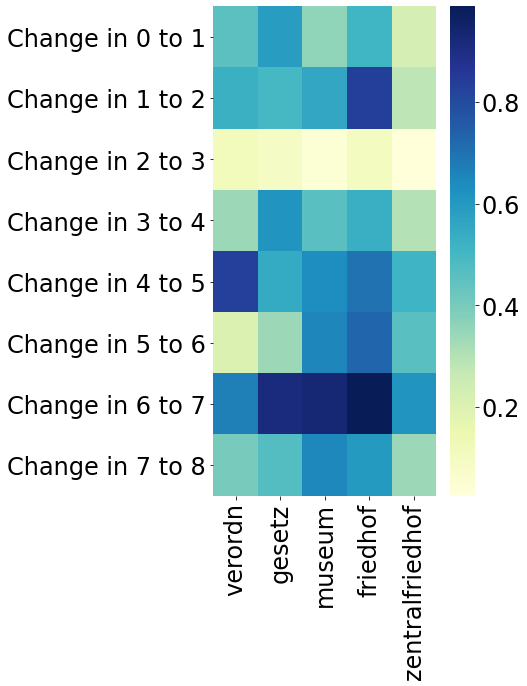

In [381]:
fig, ax = plt.subplots(figsize = (len(stable_words_changes), len(cols)))
ax = sns.heatmap(stable_changes_df.transpose(copy=True), ax = ax, cmap="YlGnBu")
x = ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 24)
y = ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 24)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
# plt.savefig("semantic_changes.pdf", bbox_inches = 'tight')
cbar.ax.tick_params(labelsize=24)

In [152]:
list(np.unique(missing_words))

['fuersorg',
 'gemeindewohn',
 'hausverwalt',
 'stadterneuer',
 'wohnbaufoerder',
 'wohnbauprogramm']

In [382]:
plot_changes = {}

In [383]:
for word in changes:
    if len(changes[word]) > 0:
        plot_changes[word] = changes[word]

In [384]:
changes_df = pd.DataFrame.from_dict(plot_changes).transpose().rename(columns=cols)

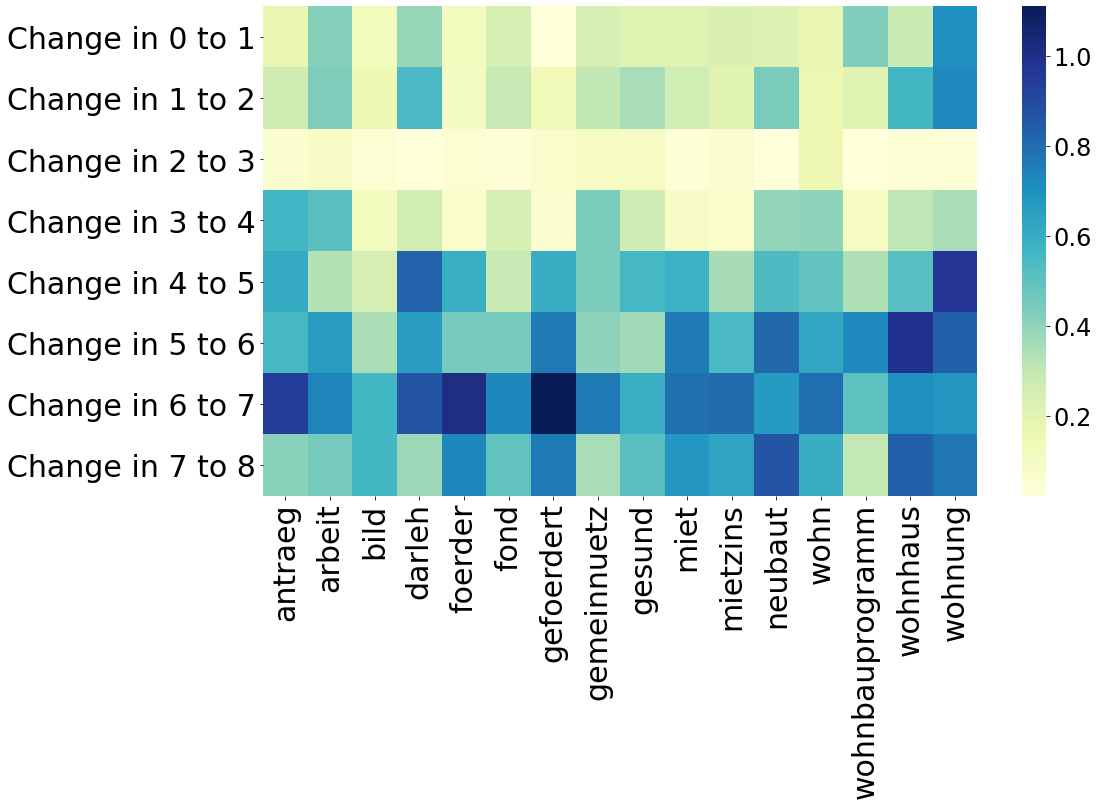

In [385]:
fig, ax = plt.subplots(figsize = (len(plot_changes), len(cols)))
ax = sns.heatmap(changes_df.transpose(copy=True), ax = ax, cmap="YlGnBu")
x = ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 30)
y = ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 30)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
# plt.savefig("semantic_changes.pdf", bbox_inches = 'tight')
cbar.ax.tick_params(labelsize=24)

1918-1935 - 0

1946-1954 - 1

1955-1959 - 2

1960-1964 - 3

1965-1968 - 4 

1969-1979 - 5

1980-1989 - 6

1990-1996 - 7

1997-2009 - 8


In [387]:
w2vmodel_0.wv.most_similar("wohn")

[('grossjedlersdorf', 0.9970681667327881),
 ('entlang', 0.9965687394142151),
 ('wald', 0.9964935779571533),
 ('widmung', 0.9960989356040955),
 ('suedlich', 0.995634913444519),
 ('asp', 0.9954532980918884),
 ('altmannsdorf', 0.9954342246055603),
 ('geschoss', 0.9954236149787903),
 ('seil', 0.9953118562698364),
 ('gehweg', 0.9950515031814575)]

In [388]:
w2vmodel_1.wv.most_similar("wohn")

[('fond', 0.9733263254165649),
 ('geschaeft', 0.9731007218360901),
 ('raumlich', 0.9724422097206116),
 ('baufuehr', 0.9718977808952332),
 ('wohnungswes', 0.9683624505996704),
 ('benuetzungsbewill', 0.9540009498596191),
 ('zubaut', 0.9438771605491638),
 ('vermietet', 0.9430240988731384),
 ('uebernomm', 0.9410433173179626),
 ('gemeinnuetz', 0.9391319751739502)]

In [125]:
def common_similar_words(model_1, model_2, key_word):
    words_1, words_2 = [], []
    for word_prob in model_1.wv.most_similar(key_word, topn=25):
        word, prob = word_prob
        words_1.append(word)
    for word_prob in model_2.wv.most_similar(key_word, topn=25):
        word, prob = word_prob
        words_2.append(word)
    common_words = set(words_1)&set(words_2)
    return common_words

In [413]:
def word_pair_changes(word_1, word_2, time_periods=len(embeddings_dict)):
    differences = []
    for i in range(0, time_periods) :
        difference = scipy.spatial.distance.cosine(comparedEmbeddings['0'][i].wv[word_1], 
                                                   comparedEmbeddings['0'][i].wv[word_2])
        differences.append(difference)
    plt.plot(range(0, time_periods), differences, 'o--', color='red', alpha=0.3)
    plt.title("Changes in distance over time for " + word_1 + " and " + word_2)
    plt.xlabel("Transition in time period")
    plt.ylabel("Cosine Distance")
    plt.show()

In [435]:
for embedding in embeddings_dict:
    print("wohnung")
    print(embeddings_dict[embedding].wv.most_similar("wohnung"))
    print("\n")


wohnung
[('verbaut', 0.9297688007354736), ('gesamtflaech', 0.852647602558136), ('gartenanlag', 0.8064501881599426), ('besteh', 0.805501401424408), ('architekt', 0.8023440837860107), ('verkehr', 0.7890377640724182), ('strass', 0.7592474222183228), ('wasserbau', 0.7499394416809082), ('gesetzt', 0.7451968789100647), ('geschaeft', 0.7440013289451599)]


wohnung
[('wohnraum', 0.9196868538856506), ('neubaut', 0.8878768086433411), ('gebaeud', 0.87017422914505), ('haus', 0.8682616353034973), ('abgang', 0.8639350533485413), ('raum', 0.8586826324462891), ('wohnhaus', 0.8544937968254089), ('amtsgebaeud', 0.8414006233215332), ('kleingartenwes', 0.8282016515731812), ('zugang', 0.826656699180603)]


wohnung
[('fond', 0.9135522246360779), ('haus', 0.9129976034164429), ('wohnraum', 0.9115489721298218), ('baufuehr', 0.9033264517784119), ('neubaut', 0.8905044794082642), ('vermietet', 0.8731552958488464), ('geschaeftslokal', 0.8667307496070862), ('wohnhaus', 0.8658428192138672), ('kleingartenwes', 0.8605

In [440]:
for embedding in embeddings_dict:
    print("zentralfriedhof")
    print(embeddings_dict[embedding].wv.most_similar("zentralfriedhof"))
    print("\n")


zentralfriedhof
[('fuehrend', 0.9954879283905029), ('poetzleinsdorf', 0.9950294494628906), ('plan', 0.9948194622993469), ('schlachthof', 0.9947202801704407), ('stadion', 0.9945149421691895), ('westlich', 0.9939391613006592), ('asp', 0.9935020804405212), ('siedlung', 0.9933404922485352), ('umwandl', 0.9931809902191162), ('oestlich', 0.9931267499923706)]


zentralfriedhof
[('tor', 0.9957450032234192), ('feuerhall', 0.9926887154579163), ('park', 0.9876596331596375), ('brunn', 0.985539436340332), ('rennweg', 0.9843115210533142), ('strebersdorf', 0.9836219549179077), ('hetzendorf', 0.9834686517715454), ('sievering', 0.9834643602371216), ('grossjedlersdorf', 0.9833133816719055), ('katastralgemeind', 0.9827175736427307)]


zentralfriedhof
[('tor', 0.9899242520332336), ('feuerhall', 0.9819861054420471), ('wald', 0.9808334112167358), ('hirschstett', 0.9747615456581116), ('abgetrag', 0.9741755723953247), ('leopoldau', 0.9732032418251038), ('neustift', 0.9729570746421814), ('befestigt', 0.9725834

In [436]:
for embedding in embeddings_dict:
    print("liegenschaft")
    print(embeddings_dict[embedding].wv.most_similar("liegenschaft"))
    print("\n")


liegenschaft
[('bertrag', 0.9841398596763611), ('wein', 0.9826672673225403), ('befristet', 0.9811018705368042), ('getraenk', 0.9809935092926025), ('berweis', 0.9764297008514404), ('fluessig', 0.972693145275116), ('vorgeschrieb', 0.9725315570831299), ('gemeindeabgab', 0.9721506237983704), ('hauseigentuem', 0.9714426398277283), ('zulaess', 0.9714402556419373)]


liegenschaft
[('bereich', 0.9910101890563965), ('mietobjekt', 0.9884575605392456), ('rueckstell', 0.9884517788887024), ('rationell', 0.988204836845398), ('staedtebau', 0.9879343509674072), ('bernahm', 0.987905740737915), ('auflass', 0.9878153204917908), ('raeumung', 0.9873818159103394), ('einbaut', 0.987327516078949), ('grundbuech', 0.9864464402198792)]


liegenschaft
[('wohnbauprogramm', 0.9853484034538269), ('baurecht', 0.9827089905738831), ('enthaelt', 0.9792311787605286), ('ausgedehnt', 0.9774420857429504), ('abgeschloss', 0.9758548140525818), ('womit', 0.9727752804756165), ('einzel', 0.9721876382827759), ('bebaut', 0.9719566

In [430]:
words_check = ["steu", "neubaut", "foerder"]

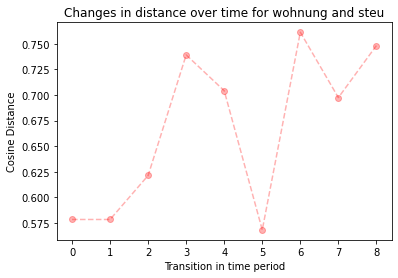

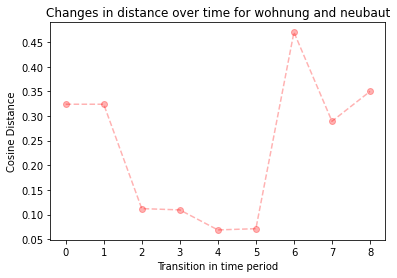

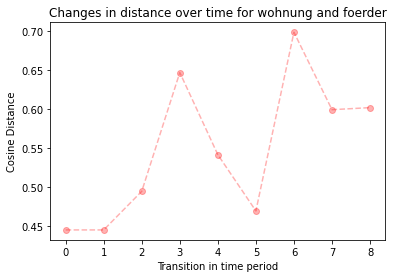

KeyError: "Key 'wohnbeihilfe' not present"

In [429]:
for word in words_check:
    word_pair_changes("wohnung", word)

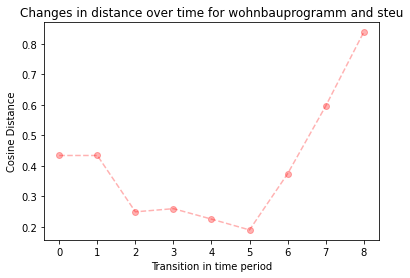

In [415]:
word_pair_changes("wohnbauprogramm", "steu")

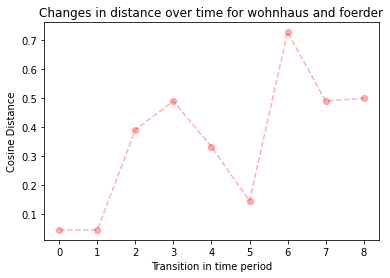

In [416]:
word_pair_changes("wohnhaus", "foerder")

In [ ]:
def co

In [408]:
w2vmodel_5.wv.most_similar("wohnung", topn=30)

[('miet', 0.8150902390480042),
 ('wohnungswerb', 0.7948437333106995),
 ('lokal', 0.7846913933753967),
 ('geschaeftslokal', 0.7562687993049622),
 ('vermietet', 0.7411354780197144),
 ('wohnhaus', 0.7090665698051453),
 ('obdachlos', 0.7026207447052002),
 ('zuweis', 0.7008947730064392),
 ('althaus', 0.6997345089912415),
 ('drohend', 0.6943254470825195),
 ('mietobjekt', 0.6900108456611633),
 ('ehepaar', 0.6691433191299438),
 ('wohnraum', 0.664364755153656),
 ('hausbesorg', 0.6642634272575378),
 ('zugewies', 0.647770881652832),
 ('wohnt', 0.6477298736572266),
 ('mietzins', 0.6395890116691589),
 ('ybbsruch', 0.6237818598747253),
 ('einzelperson', 0.622535765171051),
 ('delogier', 0.6193985342979431),
 ('nachtraeg', 0.6156103610992432),
 ('vorgemerkt', 0.6126703023910522),
 ('vormerk', 0.6096047759056091),
 ('stieg', 0.6057095527648926),
 ('famili', 0.5973134636878967),
 ('bedroht', 0.5914593935012817),
 ('zugang', 0.59050053358078),
 ('mahlzeit', 0.5874741077423096),
 ('bewohn', 0.58248269557

In [297]:
scipy.spatial.distance.cosine(w2vmodel_0.wv["wohnung"], w2vmodel_0.wv["foerder"])

0.19035214185714722

In [229]:
scipy.spatial.distance.cosine(w2vmodel_1.wv["wohnung"], w2vmodel_1.wv["foerder"])

0.4545522928237915

In [230]:
scipy.spatial.distance.cosine(w2vmodel_2.wv["wohnung"], w2vmodel_2.wv["foerder"])

0.7597985416650772

In [231]:
scipy.spatial.distance.cosine(w2vmodel_3.wv["wohnung"], w2vmodel_3.wv["foerder"])

0.6714374125003815

In [232]:
scipy.spatial.distance.cosine(w2vmodel_4.wv["wohnung"], w2vmodel_4.wv["foerder"])

0.5898559093475342

In [123]:
common_similar_words(w2vmodel_1, w2vmodel_2, "wohn")

set()

In [218]:
common_similar_words(w2vmodel_2, w2vmodel_3, "wohnung")

{'bauperiod',
 'bedroht',
 'bewohnt',
 'geschaeftslokal',
 'miet',
 'mietobjekt',
 'vermietet',
 'wohnhaus',
 'wohnraum',
 'wohnungsnot'}

In [117]:
common_similar_words(w2vmodel_3, w2vmodel_4, "wohn")

{'bergab',
 'geschaeftsgrupp',
 'geschaeftshaus',
 'geschaeftslokal',
 'kommunal',
 'wohngebaeud',
 'wohnhaus',
 'wohnungswes'}

### Closest Words Across Time

Word_0 -> closest words
Word_1 -> closest words
Word_2 -> closest words

In [ ]:
# change here to include all time periods in a single file
def words_to_csv(model_dict, name_file, key_words=search_words):
    with open(name_file, 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile)
        for word in key_words:
            for i, model in enumerate(model_dict):
                try:
                    spamwriter.writerow(["Closest Words to  " + word + " in time period " + str(i)])
                    spamwriter.writerow(model_dict[model].wv.most_similar(word))
                    spamwriter.writerow("\n")                    
                except KeyError:
                    spamwriter.writerow(["Word not in time period"])
                    print(word)
                    pass

In [ ]:
words_to_csv(embeddings_dict, "closewords_window_5.csv")

In [ ]:
words_to_csv(w2vmodel_1, "closewords_time_1.csv")

In [ ]:
words_to_csv(w2vmodel_2, "closewords_time_2.csv")

In [ ]:
words_to_csv(w2vmodel_3, "closewords_time_3.csv")

In [ ]:
words_to_csv(w2vmodel_4, "closewords_time_4.csv")

## Filtering based on close words

In [ ]:
all_texts = []

In [ ]:
for time in timed_docs:
    for doc in time:
        all_texts.append(doc)

In [ ]:
len(all_texts)

In [ ]:
w2vmodel = Word2Vec(
        all_texts,
        vector_size=100,
        window=10)

In [ ]:
housing_red_words = ["miethaeus",
"wohnung",
"wohnhaus",
"wohnhaeus",
"gemeindebau",
"wohn",
"wohnungsberatungszentrum",
"wohnbausteuer",
"zinshaeus",
"zinhaus",
"mietzins",
"wohnsiedlung",
"wohnungsbeduerftig",
"gemeindewohn",
"hausbesorger",
"wohnungsvergab",
"wohnbauprogramm",
"hausverwalt"]

In [ ]:
all_close_words = []

In [ ]:
for word in housing_red_words:
    try:
        for info in w2vmodel.wv.most_similar(word):
            w, perc = info
            all_close_words.append(w)
    except KeyError:
        print(word)
        continue

In [ ]:
key_words = all_close_words + housing_red_words

In [ ]:
key_words

In [ ]:
new_timed_docs = [[],[],[],[],[]]

In [ ]:
for i, time in enumerate(timed_docs):
    for doc in time:
         for word in key_words:
            if word in doc:
                new_timed_docs[i].append(doc)
                break
            

In [ ]:
for time in timed_docs:
    print(len(time))

In [ ]:
for time in new_timed_docs:
    print(len(time))

In [ ]:
timed_dict = {}

In [ ]:
for i, time in enumerate(new_timed_docs):
    timed_dict[i] = time

In [ ]:
import json
with open('timed_filtered_data.json', 'w') as f:
    json.dump(timed_dict, f)

In [417]:
import gensim.downloader as api


In [418]:
import json
info = api.info()

In [419]:
for model_name, model_data in sorted(info['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'],
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix.
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets, 27B toke